In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.model_selection import *
from sklearn.tree import *
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("C:/Users/nikhi/Downloads/water_potability.csv")
#reads the dataset
df.head()
#checks first five rows of the dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [60]:
df.tail()
#checks last five rows of the dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [61]:
df.count()
#checking for non NA values

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64

In [62]:
df.nunique(axis=1)
## total no of unique values in each rows

0        9
1        9
2        9
3       10
4       10
        ..
3271    10
3272     8
3273     9
3274     9
3275     9
Length: 3276, dtype: int64

In [63]:
df.nunique()
# total no of unique values in each columns

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [64]:
df.isna()
#checking for null values

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [65]:
df.isna().sum()
#checking for the sum of null values

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [66]:
df.info()
#prints basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [67]:
print(f"total_no_of_rows:{df.shape[0]} and colums:{df.shape[1]}")
#prints total no of rows and columns

total_no_of_rows:3276 and colums:10


In [68]:
df.duplicated().sum()
#checks the number of duplicated values

0

In [69]:
#statasic analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [70]:
df.max(axis=0)
#checks max value in each row

ph                    14.000000
Hardness             323.124000
Solids             61227.196008
Chloramines           13.127000
Sulfate              481.030642
Conductivity         753.342620
Organic_carbon        28.300000
Trihalomethanes      124.000000
Turbidity              6.739000
Potability             1.000000
dtype: float64

In [71]:
df.fillna(df.mean(),inplace=True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [72]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [73]:
df.count()

ph                 3276
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            3276
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3276
Turbidity          3276
Potability         3276
dtype: int64

In [74]:
y=df["Potability"]
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [75]:
del df["Potability"]
x=df
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=None)

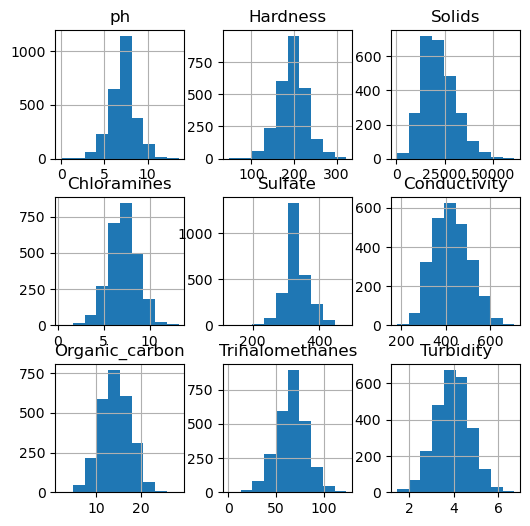

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1213,7.139428,179.234979,19862.811257,8.111958,337.947095,364.523151,17.384471,88.361846,3.771596
2078,5.841119,194.616894,17721.959557,5.646297,410.358673,622.963575,17.629541,93.070691,4.237560
2874,8.339437,175.596742,12629.853049,6.976314,333.775777,452.337520,17.528839,101.851393,4.133696
2522,9.152285,229.540413,24560.700606,7.042326,372.694465,395.404362,14.253308,40.974355,3.792777
210,5.869737,207.725455,22244.218236,6.597764,352.563987,465.616481,14.838100,77.822737,4.689315
...,...,...,...,...,...,...,...,...,...
191,7.593128,261.566173,18371.057201,6.297543,333.775777,387.629572,16.575981,51.830948,3.377338
2679,7.103348,249.589359,4425.426440,8.211762,293.078666,268.440850,18.422985,68.474194,4.417194
2015,6.510856,223.860622,15147.171464,7.667533,389.391148,437.051364,12.085026,52.339075,4.225608
1989,8.164992,278.340358,29045.261138,7.992914,334.551966,384.783185,17.406626,64.210767,4.162496


In [77]:
X_train.hist(figsize=(6,6))
plt.show()
X_train

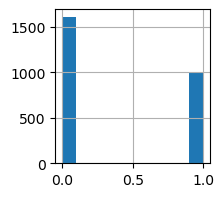

1213    1
2078    0
2874    0
2522    0
210     0
       ..
191     0
2679    0
2015    1
1989    1
322     1
Name: Potability, Length: 2620, dtype: int64

In [78]:
Y_train.hist(figsize=(2,2))
plt.show()
Y_train

In [79]:
#Decision tree classifier model
a1=DecisionTreeClassifier()


#dumping training sets in to the model
a1.fit(X_train,Y_train)

#calculating the prediction
prediction=a1.predict(X_test)

#Calculating the accuracy
a=accuracy_score(prediction,Y_test)*100
print("DecisionTreeClassifier - ",a)


DecisionTreeClassifier -  58.231707317073166


In [80]:
#LogisticRegression model
a2=LogisticRegression()


#dumping training sets in to the model
a2.fit(X_train,Y_train)


#calculating the prediction
pred=a2.predict(X_test)


#Calculating the accuracy
b=accuracy_score(Y_test,pred)*100
print("LogisticRegression - ",b)

LogisticRegression -  58.6890243902439


In [81]:
#RandomForestClassifier model
a3=RandomForestClassifier()


#dumping training sets in to the model
a3.fit(X_train,Y_train)


#calculating the prediction
predi=a3.predict(X_test)


#Calculating the accuracy
c=accuracy_score(predi,Y_test)*100
print("RandomForestClassifier - ",c)

RandomForestClassifier -  66.46341463414635


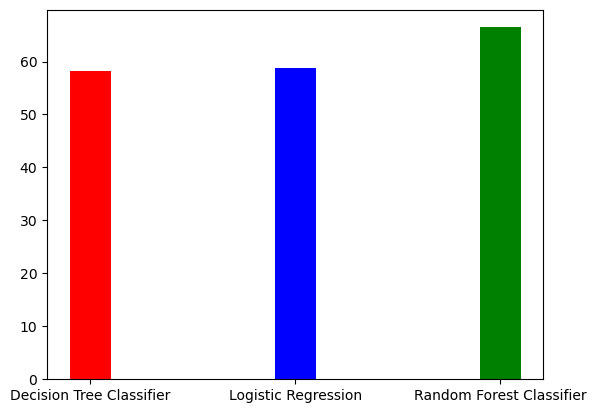

In [85]:
i=[a,b,c]
j=["Decision Tree Classifier","Logistic Regression","Random Forest Classifier"]
df=pd.DataFrame({"models":j,"score":i})
plt.bar(j,i,width=0.2,color=['red','blue','green'])
plt.show()